# The goal of this project is to build a machine learning model that is able to predict the quality of whine by giving it a note from 1 to 10.

## The main features used are the following:




*   fixed_acidity
*   volatile_acidity
* citric_acid
* residual_sugar
* chlorides
* free_sulfur_dioxide
* total_sulfur_dioxide
* density
* pH
* sulphates

---

**The dataset used for our experimentation is: https://archive.ics.uci.edu/dataset/186/wine+quality**




# Imports all necessary libraries


In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold,RandomizedSearchCV,StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
#from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import auc,accuracy_score,confusion_matrix,mean_squared_error
from sklearn.metrics import recall_score, precision_score, roc_auc_score,f1_score,auc,roc_curve,precision_recall_curve,accuracy_score
from sklearn.preprocessing import label_binarize

# Load Dour Dataset

## The dataset we chose is from Wine Quality(https://archive.ics.uci.edu/dataset/186/wine+quality)

In [51]:
red_wine_df = pd.read_csv('winequality-red.csv',sep=';')

In [52]:
white_wine_df = pd.read_csv('winequality-white.csv',sep=';')

In [53]:
red_wine_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [54]:
white_wine_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [55]:
white_wine_df.shape

(4898, 12)

In [56]:
red_wine_df.shape

(1599, 12)

In [57]:
red_wine_df.insert(11, 'color', np.zeros((red_wine_df.shape[0], 1)))

In [62]:
red_wine_df['color'] = red_wine_df['color'].astype(int)

In [58]:
white_wine_df.insert(11, 'color', np.ones((white_wine_df.shape[0], 1)))

In [64]:
white_wine_df['color'] = white_wine_df['color'].astype(int)

# Merging our two csv file into one data frame

In [65]:
wine_df = pd.concat([red_wine_df,white_wine_df])

In [66]:
wine_df.shape

(6497, 13)

In [67]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  color                 6497 non-null   int64  
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [68]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,0.753886,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.430779,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,1.000000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,1.000000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,1.000000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000,9.000000


*   Checking the total number of null values

*  Checking the  number of null values for each columns


In [69]:
null_count = wine_df.isnull().sum().sum()
null_count_per_column = wine_df.isnull().sum()

print(f"Total number of null values: {null_count}")
print(f"Number of null values for each column:\n{null_count_per_column}")

Total number of null values: 0
Number of null values for each column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
color                   0
quality                 0
dtype: int64


# Diplay the number of red and white wine

<ipython-input-74-90fae8b43d95>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(names)


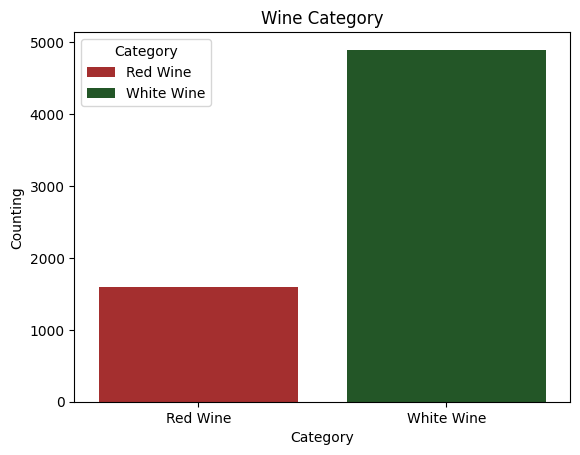

In [74]:
names = ['Red Wine', 'White Wine']
ax = sns.countplot(data=wine_df,x='color',palette=['#B71C1C','#1B5E20'],
                   hue='color',dodge=False)
ax.set_title('Wine Category')
ax.set_xlabel('Category')
ax.set_ylabel('Counting')
ax.set_xticklabels(names)
plt.legend(names,title='Category')
plt.show()

# Display wine quality

<ipython-input-76-ede19065bb50>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(names)


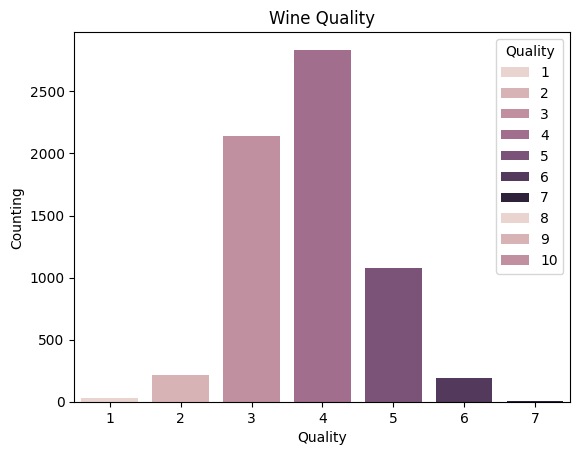

In [76]:
names = ['1', '2','3','4','5','6','7','8','9','10']
ax = sns.countplot(data=wine_df,x='quality',
                   hue='quality',dodge=False)
ax.set_title('Wine Quality')
ax.set_xlabel('Quality')
ax.set_ylabel('Counting')
ax.set_xticklabels(names)
plt.legend(names,title='Quality')
plt.show()

# Check if there are some correlations between variables

In [77]:
wine_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.486740,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.653036,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.187397,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,0.348821,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.512678,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.471644,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,0.700357,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.390645,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,-0.329129,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,-0.487218,0.038485


In [126]:
def recall_method(preds, target,average):
  return  recall_score(target, np.round(preds),average=average)

def precision_method(preds, target,average):
  return  precision_score(target, np.round(preds),average=average)

def roc_auc_method(preds, target,average):
  target_binarized = label_binarize(target, classes=np.unique(target))
  preds_binarized = label_binarize(np.round(preds), classes=np.unique(target))
  return roc_auc_score(target_binarized, preds_binarized, average='macro')
  #return  roc_auc_score(target, np.round(preds),average='macro',multi_class='ovr')

def f1_score_method(preds,target,average):
  return  f1_score(target,np.round(preds),average=average)

def accuracy_score_method(preds,target):
  return  accuracy_score(target,np.round(preds))

In [127]:
def show_performance_metrics(y_pred,y_test,average):
  print('recall: ',recall_method( y_pred, y_test,average))
  print( 'precision: ',precision_method( y_pred, y_test,average))
  print( 'roc_auc',roc_auc_method( y_pred, y_test,average))
  print('f1_score_method',f1_score_method(y_pred,y_test,average))
  print('accuracy_score: ',accuracy_score_method(y_pred,y_test))

# Normalize our dataset before trainning it

In [83]:
normalize = StandardScaler()

In [248]:
x = wine_df.drop('quality',axis=1)
x = x.drop('color',axis=1)
y = wine_df['quality']
x = normalize.fit_transform(x)

# Split our dataset

In [250]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

# Test XGBoost Algorithm

In [251]:
def plot_xgb_learning_curve(results_dict,xgb_test):
  for i in results_dict:
    for err in results_dict[i]:
        plt.plot(results_dict[i][err], label=i+' '+err)
  plt.axvline(xgb_test.best_iteration, c='green', label='best iteration')
  plt.xlabel('Epoch')
  plt.ylabel('Losses')
  # plt.ylabel(err)
  plt.title('xgboost training curves')
  plt.legend()
  plt.grid()

In [252]:
results_dict = {}
xgb_params = {
    'max_depth': 50,
    'objective': 'multi:softmax',
    'random_state': 0,
    'eval_metric': 'mlogloss',
    'num_class': 10,
}

In [253]:
tmp_xtrain = x_train

In [254]:
tmp_xtrain.shape

(5847, 11)

In [255]:
validation_size = (tmp_xtrain.shape[0] * 20)/100

In [256]:
validation_size = int(validation_size)

In [257]:
validation_size

1169

In [258]:
train_size = int(tmp_xtrain.shape[0])
print(train_size)

5847


In [259]:
tmp_xtrain = x_train[0:(train_size-validation_size)]
tmp_ytrain = y_train[0:(train_size-validation_size)]

In [260]:
validation_xtrain = x_train[(train_size-validation_size):(train_size+validation_size)]
validation_ytrain = y_train[(train_size-validation_size):(train_size+validation_size)]

In [261]:
d_train = xgb.DMatrix(tmp_xtrain, label=tmp_ytrain)
d_valid = xgb.DMatrix(validation_xtrain, label=validation_ytrain)

In [262]:
d_test = xgb.DMatrix(x_test,label=y_test)

In [263]:
xgb_model = xgb.train(
    xgb_params,
    d_train,
    num_boost_round = 10,
    verbose_eval=False,
    early_stopping_rounds=5,
    evals=[(d_train, 'train'), (d_valid, 'test')],
    evals_result=results_dict,
)

In [264]:
y_pred_xgb = xgb_model.predict(d_test)

In [265]:
show_performance_metrics(y_pred_xgb,d_test.get_label(),'micro')

recall:  0.6476923076923077
precision:  0.6476923076923077
roc_auc 0.6429161000498714
f1_score_method 0.6476923076923077
accuracy_score:  0.6476923076923077


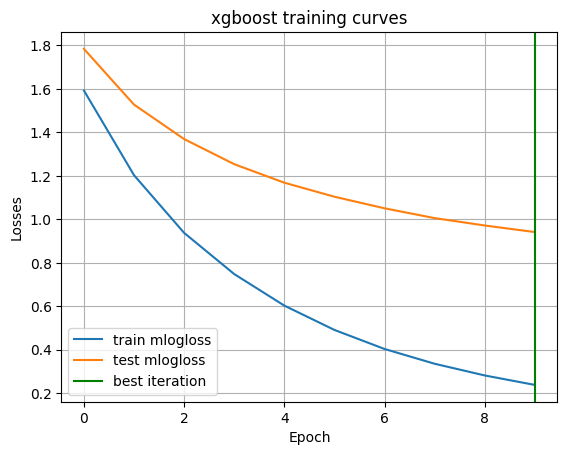

In [266]:
plot_xgb_learning_curve(results_dict,xgb_model)

In [274]:
xgb_model.feature_names = wine_df.columns.tolist()[:-2]

In [276]:
len(xgb_model.feature_names)

11

<Axes: title={'center': 'Importance of features'}, xlabel='F score', ylabel='Features(columns)'>

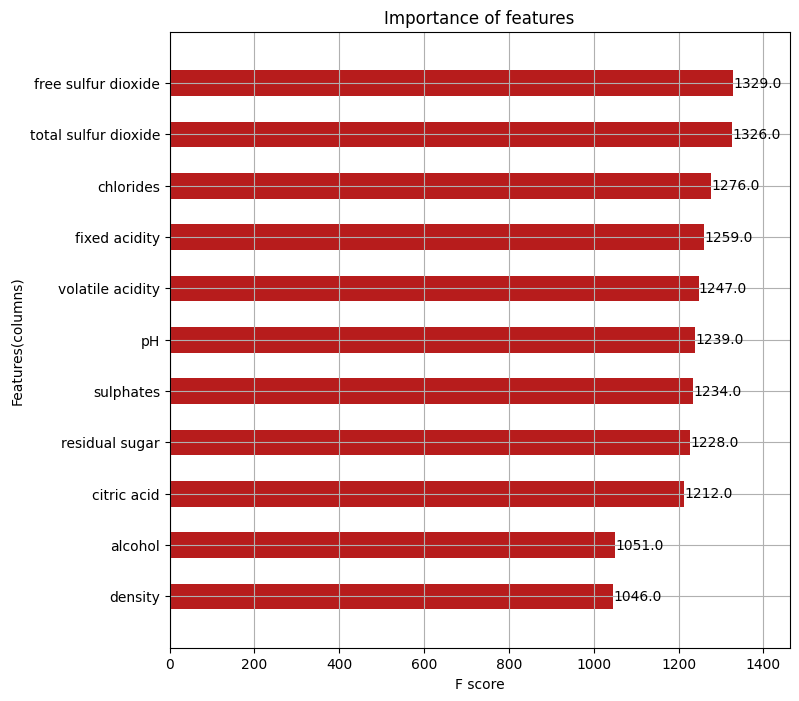

In [277]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
xgb.plot_importance(xgb_model, max_num_features=11,
                    height=0.5, ax=ax, color='#B71C1C', ylabel='Features(columns)', title='Importance of features')